# Results Analysis

This notebook uses the saved results objects to analyse the results of the trained models over multiple runs. It will look at each of the datasets in turn, with each method studied within.

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

def get_files(results_folder, dataset):
    all_files = list(set([os.path.join(results_folder, f) for f in os.listdir(results_folder) if (dataset+"_") in f]))
    return all_files

# function for loading and creating a pandas dataframe of the results and the hyperparameters
def process_results2pandas(results_folder, dataset):
    """Creates a pandas table from the saved results dicts
    related to the input dataset name
    
    Args:
        results_folder (str or Path)
        dataset = (str) string name of dataset to pick out, should be one of:
            drugcomb, drugcombdb, drugbankddi, OncoPolyPharmacology, twosides
    
    """
    df_columns = ["dataset_name", "emb_decomposition", "emb_dimension", "emb_num_epochs", "model_name", "model_num_epochs", "model_batch_size", "train_size", "random_seed", "results_auc", "results_losses"]
    df_rows = []
    all_files = get_files(results_folder, dataset)
    for fpath in all_files:
        with open(fpath) as fh:
            results_dict = json.load(fh) 
        f = os.path.basename(fpath)
        f = f.replace(".json", "")
        
        if len(f.split("_")) == 10:
            dataset_name, emb_decomposition, emb_dimension, emb_num_epochs, model_name, model_num_epochs, _, model_batch_size, train_size, random_seed = f.split("_")
        else:
            dataset_name, model_name, model_num_epochs, _, model_batch_size, train_size, random_seed = f.split("_")
            emb_decomposition, emb_dimension, emb_num_epochs = 0,0,0
            
        # Reset Types
        dataset_name = dataset_name
        emb_decomposition = emb_decomposition
        emb_dimension = int(emb_dimension)
        emb_num_epochs = int(emb_num_epochs)
        model_name = model_name
        model_num_epochs = int(model_num_epochs)
        model_batch_size = int(model_batch_size)
        train_size = float(train_size)
        random_seed = int(random_seed)
        
        results_auc = results_dict['evaluation']['roc_auc']
        results_losses = np.array(results_dict['losses'])
    
        # Populate table
        row = [dataset_name, emb_decomposition, emb_dimension, emb_num_epochs, model_name, model_num_epochs, model_batch_size, train_size, random_seed, results_auc, results_losses]
        df_rows.append(row)
    
    df = pd.DataFrame(df_rows, columns=df_columns)
    return df




# Study hyperparameters

In [2]:

embdim = 64
embepochs = 1000
model_num_epochs = 250

# DrugCombDB

In [3]:
df = process_results2pandas("results", "drugcombdb")

# Sample down
df = df[((df['emb_dimension']==embdim) | (df['emb_dimension']==0)) & ((df['emb_num_epochs']==embepochs) | (df['emb_num_epochs']==0)) & (df['model_num_epochs']==model_num_epochs)]

# Summarise
for model_name in sorted(list(set(df.model_name))):
    if model_name in ["DROnly", "DeepDRSynergy", "EPGCNDSDR", "DeepDDSDR", "MatchMakerDR", "DeepDrugDR"]:
        model_specific_df = df[(df['model_name']==model_name)]
        print(f"\n### {model_name}")
        for decomposition in sorted(list(set(model_specific_df.emb_decomposition) - set(["wl1", "wl2"]))):
            ddf = model_specific_df[(model_specific_df['emb_decomposition']==decomposition)]
            mean_auc = np.around(np.mean(ddf.results_auc), 3)
            std_auc = np.around(np.std(ddf.results_auc), 3)
            num_emp_samples = len(ddf.results_auc)
            print(f"{model_name}_{decomposition}: auc: {mean_auc} +- {std_auc} with {num_emp_samples} samples")


### DROnly
DROnly_sp: auc: 0.711 +- 0.004 with 5 samples
DROnly_wl3: auc: 0.763 +- 0.002 with 5 samples

### DeepDDSDR
DeepDDSDR_sp: auc: 0.79 +- 0.003 with 5 samples
DeepDDSDR_wl3: auc: 0.799 +- 0.004 with 5 samples

### DeepDRSynergy
DeepDRSynergy_sp: auc: 0.813 +- 0.003 with 5 samples
DeepDRSynergy_wl3: auc: 0.814 +- 0.004 with 5 samples

### DeepDrugDR
DeepDrugDR_sp: auc: 0.743 +- 0.0 with 5 samples
DeepDrugDR_wl3: auc: 0.743 +- 0.001 with 5 samples

### EPGCNDSDR
EPGCNDSDR_sp: auc: 0.704 +- 0.001 with 5 samples
EPGCNDSDR_wl3: auc: 0.711 +- 0.002 with 5 samples

### MatchMakerDR
MatchMakerDR_sp: auc: 0.784 +- 0.004 with 5 samples
MatchMakerDR_wl3: auc: 0.783 +- 0.002 with 5 samples


In [4]:
# ## Performance Histograms
# sns.catplot(x = "model_name", y = "results_auc", kind="bar", data=df)
# plt.xticks(rotation=45)

# DrugComb

In [5]:
df = process_results2pandas("results", "drugcomb")

# Sample down
df = df[((df['emb_dimension']==embdim) | (df['emb_dimension']==0)) & ((df['emb_num_epochs']==embepochs) | (df['emb_num_epochs']==0)) & (df['model_num_epochs']==model_num_epochs)]

# Summarise
for model_name in sorted(list(set(df.model_name))):
    if model_name in ["DROnly", "DeepDRSynergy", "EPGCNDSDR", "DeepDDSDR", "MatchMakerDR", "DeepDrugDR"]:
        model_specific_df = df[(df['model_name']==model_name)]
        print(f"\n### {model_name}")
        for decomposition in sorted(list(set(model_specific_df.emb_decomposition) - set(["wl1", "wl2"]))):
            ddf = model_specific_df[(model_specific_df['emb_decomposition']==decomposition)]
            mean_auc = np.around(np.mean(ddf.results_auc), 3)
            std_auc = np.around(np.std(ddf.results_auc), 3)
            num_emp_samples = len(ddf.results_auc)
            print(f"{model_name}_{decomposition}: auc: {mean_auc} +- {std_auc} with {num_emp_samples} samples")


### DROnly
DROnly_sp: auc: 0.621 +- 0.002 with 5 samples
DROnly_wl3: auc: 0.651 +- 0.002 with 5 samples

### DeepDDSDR
DeepDDSDR_sp: auc: 0.694 +- 0.002 with 5 samples
DeepDDSDR_wl3: auc: 0.7 +- 0.002 with 5 samples

### DeepDRSynergy
DeepDRSynergy_sp: auc: 0.74 +- 0.004 with 5 samples
DeepDRSynergy_wl3: auc: 0.738 +- 0.002 with 5 samples

### DeepDrugDR
DeepDrugDR_sp: auc: 0.648 +- 0.0 with 5 samples
DeepDrugDR_wl3: auc: 0.648 +- 0.001 with 5 samples

### EPGCNDSDR
EPGCNDSDR_sp: auc: 0.622 +- 0.001 with 5 samples
EPGCNDSDR_wl3: auc: 0.627 +- 0.001 with 5 samples

### MatchMakerDR
MatchMakerDR_sp: auc: 0.714 +- 0.003 with 5 samples
MatchMakerDR_wl3: auc: 0.714 +- 0.005 with 5 samples


In [6]:
# ## Performance Histograms
# sns.catplot(x = "model_name", y = "results_auc", kind="bar", data=df)
# plt.xticks(rotation=45)

# DrugBankDDI

In [7]:
df = process_results2pandas("results", "drugbankddi")

# Sample down
df = df[((df['emb_dimension']==embdim) | (df['emb_dimension']==0)) & ((df['emb_num_epochs']==embepochs) | (df['emb_num_epochs']==0)) & (df['model_num_epochs']==model_num_epochs)]

# Summarise
for model_name in sorted(list(set(df.model_name))):
    if model_name in ["DROnly", "DeepDRSynergy", "EPGCNDSDR", "DeepDDSDR", "MatchMakerDR", "DeepDrugDR"]:
        model_specific_df = df[(df['model_name']==model_name)]
        print(f"\n### {model_name}")
        for decomposition in sorted(list(set(model_specific_df.emb_decomposition) - set(["wl1", "wl2"]))):
            ddf = model_specific_df[(model_specific_df['emb_decomposition']==decomposition)]
            mean_auc = np.around(np.mean(ddf.results_auc), 3)
            std_auc = np.around(np.std(ddf.results_auc), 3)
            num_emp_samples = len(ddf.results_auc)
            print(f"{model_name}_{decomposition}: auc: {mean_auc} +- {std_auc} with {num_emp_samples} samples")


### DROnly
DROnly_sp: auc: 0.71 +- 0.005 with 5 samples
DROnly_wl3: auc: 0.809 +- 0.005 with 5 samples

### DeepDDSDR
DeepDDSDR_sp: auc: 0.987 +- 0.001 with 5 samples
DeepDDSDR_wl3: auc: 0.989 +- 0.0 with 5 samples

### DeepDRSynergy
DeepDRSynergy_sp: auc: 0.988 +- 0.001 with 5 samples
DeepDRSynergy_wl3: auc: 0.988 +- 0.0 with 5 samples

### DeepDrugDR
DeepDrugDR_sp: auc: 0.863 +- 0.001 with 5 samples
DeepDrugDR_wl3: auc: 0.863 +- 0.0 with 5 samples

### EPGCNDSDR
EPGCNDSDR_sp: auc: 0.73 +- 0.003 with 5 samples
EPGCNDSDR_wl3: auc: 0.741 +- 0.004 with 5 samples

### MatchMakerDR
MatchMakerDR_sp: auc: 0.991 +- 0.001 with 5 samples
MatchMakerDR_wl3: auc: 0.992 +- 0.0 with 5 samples


In [8]:
# ## Performance Histograms
# sns.catplot(x = "model_name", y = "results_auc", kind="bar", data=df)
# plt.xticks(rotation=45)

In [9]:
# sdf = df[(df["model_name"]=="DeepDDSDR")]
# sdf

# TwoSides

In [10]:
df = process_results2pandas("results", "twosides")

# Sample down
df = df[((df['emb_dimension']==embdim) | (df['emb_dimension']==0)) & ((df['emb_num_epochs']==embepochs) | (df['emb_num_epochs']==0)) & (df['model_num_epochs']==model_num_epochs)]

# Summarise
for model_name in sorted(list(set(df.model_name))):
    if model_name in ["DROnly", "DeepDRSynergy", "EPGCNDSDR", "DeepDDSDR", "MatchMakerDR", "DeepDrugDR"]:
        model_specific_df = df[(df['model_name']==model_name)]
        print(f"\n### {model_name}")
        for decomposition in sorted(list(set(model_specific_df.emb_decomposition) - set(["wl1", "wl2"]))):
            ddf = model_specific_df[(model_specific_df['emb_decomposition']==decomposition)]
            mean_auc = np.around(np.mean(ddf.results_auc), 3)
            std_auc = np.around(np.std(ddf.results_auc), 3)
            num_emp_samples = len(ddf.results_auc)
            print(f"{model_name}_{decomposition}: auc: {mean_auc} +- {std_auc} with {num_emp_samples} samples")


### DROnly
DROnly_sp: auc: 0.823 +- 0.005 with 5 samples
DROnly_wl3: auc: 0.917 +- 0.002 with 5 samples

### DeepDDSDR
DeepDDSDR_sp: auc: 0.943 +- 0.001 with 5 samples
DeepDDSDR_wl3: auc: 0.944 +- 0.001 with 5 samples

### DeepDRSynergy
DeepDRSynergy_sp: auc: 0.935 +- 0.0 with 5 samples
DeepDRSynergy_wl3: auc: 0.934 +- 0.002 with 5 samples

### DeepDrugDR
DeepDrugDR_sp: auc: 0.926 +- 0.0 with 5 samples
DeepDrugDR_wl3: auc: 0.926 +- 0.001 with 5 samples

### EPGCNDSDR
EPGCNDSDR_sp: auc: 0.808 +- 0.002 with 5 samples
EPGCNDSDR_wl3: auc: 0.822 +- 0.006 with 5 samples

### MatchMakerDR
MatchMakerDR_sp: auc: 0.928 +- 0.002 with 5 samples
MatchMakerDR_wl3: auc: 0.93 +- 0.001 with 5 samples


In [11]:
# ## Performance Histograms
# sns.catplot(x = "model_name", y = "results_auc", kind="bar", data=df)
# plt.xticks(rotation=45)

### Utilities for ablation study

In [12]:
def get_files_nodataset(results_folder):
    all_files = list(set([os.path.join(results_folder, f) for f in os.listdir(results_folder)]))
    return all_files

# function for loading and creating a pandas dataframe of the results and the hyperparameters
def process_results2pandas_nodataset(results_folder):
    """Creates a pandas table from the saved results dicts
    related to the input dataset name
    
    Args:
        results_folder (str or Path)
        dataset = (str) string name of dataset to pick out, should be one of:
            drugcomb, drugcombdb, drugbankddi, OncoPolyPharmacology, twosides
    
    """
    df_columns = ["dataset_name", "emb_decomposition", "emb_dimension", "emb_num_epochs", "model_name", "model_num_epochs", "model_batch_size", "train_size", "random_seed", "results_auc", "results_losses"]
    df_rows = []
    all_files = get_files_nodataset(results_folder)
    for fpath in all_files:
        with open(fpath) as fh:
            results_dict = json.load(fh) 
        f = os.path.basename(fpath)
        f = f.replace(".json", "")
        
        if len(f.split("_")) == 10:
            dataset_name, emb_decomposition, emb_dimension, emb_num_epochs, model_name, model_num_epochs, _, model_batch_size, train_size, random_seed = f.split("_")
        else:
            dataset_name, model_name, model_num_epochs, _, model_batch_size, train_size, random_seed = f.split("_")
            emb_decomposition, emb_dimension, emb_num_epochs = 0,0,0
            
        # Reset Types
        dataset_name = dataset_name
        emb_decomposition = emb_decomposition
        emb_dimension = int(emb_dimension)
        emb_num_epochs = int(emb_num_epochs)
        model_name = model_name
        model_num_epochs = int(model_num_epochs)
        model_batch_size = int(model_batch_size)
        train_size = float(train_size)
        random_seed = int(random_seed)
        
        results_auc = results_dict['evaluation']['roc_auc']
        results_losses = np.array(results_dict['losses'])
    
        # Populate table
        row = [dataset_name, emb_decomposition, emb_dimension, emb_num_epochs, model_name, model_num_epochs, model_batch_size, train_size, random_seed, results_auc, results_losses]
        df_rows.append(row)
    
    df = pd.DataFrame(df_rows, columns=df_columns)
    return df

# Ablation Study

Here we perform an ablation study over the two hyperparameters introduced in our distributed representations
1. User specified dimensionality of distributed representations
2. User specified number of training epochs for the skipgram model

Here we explore the effects of varying these values on the downstream performance

## Number of dimensions

In [13]:
# Study hyperparameters
embdims = [8, 16, 32, 64, 128, 256, 512, 1024]
embepochs = 1000
model_num_epochs = 250
model_name = "DeepDRSynergy"
decompositions = ["wl3", "sp"]

In [14]:
# Get the table of results with all datasets, sp/wl3 decompositions, deepsynergydr
df = process_results2pandas_nodataset("results")
df = df[((df['emb_dimension'].isin(embdims)) | (df['emb_dimension']==0)) & ((df['emb_num_epochs']==embepochs) | (df['emb_num_epochs']==0)) & (df['model_num_epochs']==model_num_epochs)]
df = df[(df['model_name'] == model_name) & (df['emb_decomposition'].isin(decompositions))]

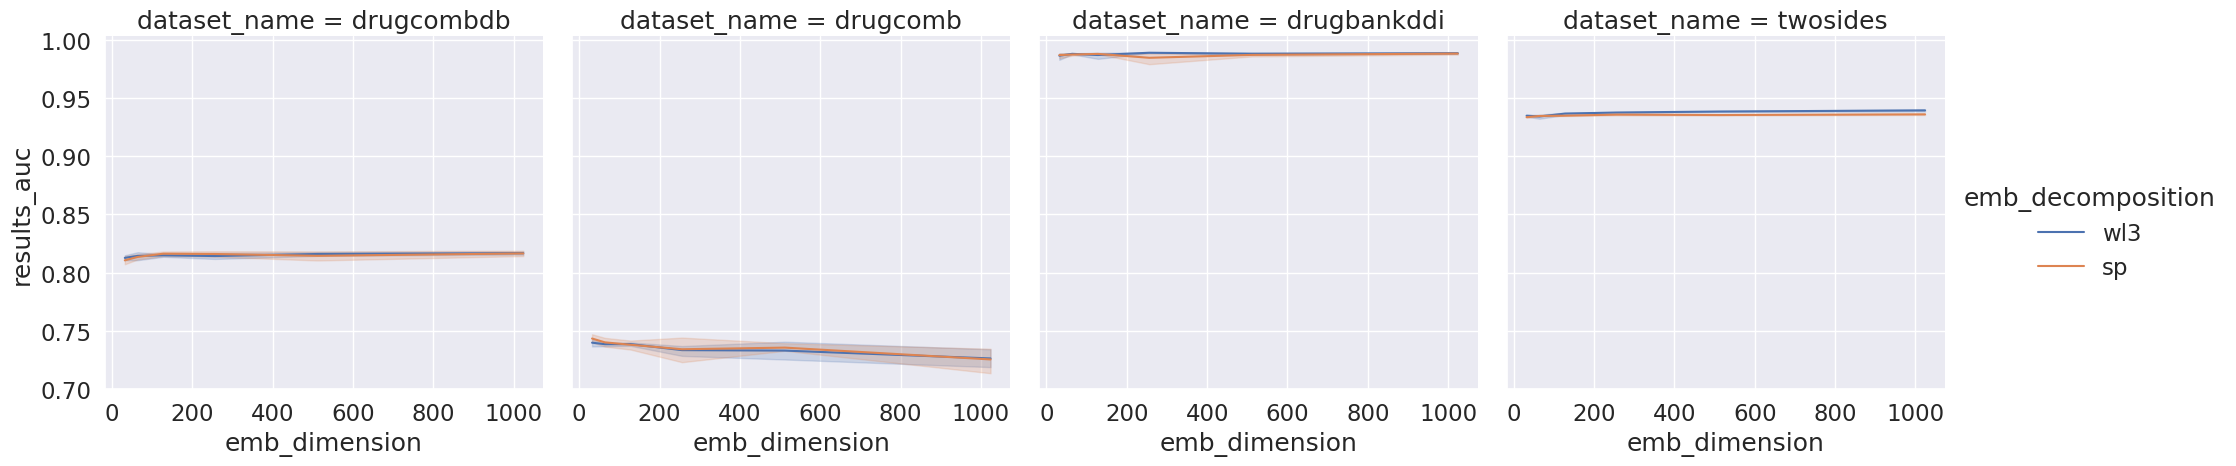

In [15]:
sns.set(font_scale=1.5)
g = sns.relplot(data = df, kind="line", 
                x="emb_dimension", 
                y="results_auc", 
                col="dataset_name", 
                col_order=["drugcombdb", "drugcomb", "drugbankddi", "twosides"], 
                hue="emb_decomposition",
                hue_order=["wl3", "sp"])
# ax0 = g.axes[0][0]
# ax0.axhline(0.933, ls="--", c="r")

### Individual dataset

In [16]:
# Get the table of results with all datasets, sp/wl3 decompositions, deepsynergydr
dataset = "drugcomb"
df = process_results2pandas("results", dataset)
df = df[((df['emb_dimension'].isin(embdims)) | (df['emb_dimension']==0)) & ((df['emb_num_epochs']==embepochs) | (df['emb_num_epochs']==0)) & (df['model_num_epochs']==model_num_epochs)]
df = df[(df['model_name'] == model_name) & (df['emb_decomposition'].isin(decompositions))]

In [17]:
from scipy.stats import pearsonr
x = df['emb_dimension']
y = df['results_auc']
r, p = pearsonr(x,y)
print(f"Pearson r: {r}")
print(f"p-value: {p}")

Pearson r: -0.5732417999049775
p-value: 1.692873790498619e-06


## Number of training epochs

In [18]:
# Study hyperparameters
embdim = 64
embepochs = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
model_num_epochs = 250
model_name = "DeepDRSynergy"
decompositions = ["wl3", "sp"]

In [19]:
# Get the table of results with all datasets, sp/wl3 decompositions, deepsynergydr, and embedding dimension==64
df = process_results2pandas_nodataset("results")
df = df[((df['emb_dimension']==embdim) | (df['emb_dimension']==0)) & ((df['emb_num_epochs'].isin(embepochs)) | (df['emb_num_epochs']==0)) & (df['model_num_epochs']==model_num_epochs)]
df = df[(df['model_name'] == model_name) & (df['emb_decomposition'].isin(decompositions))]

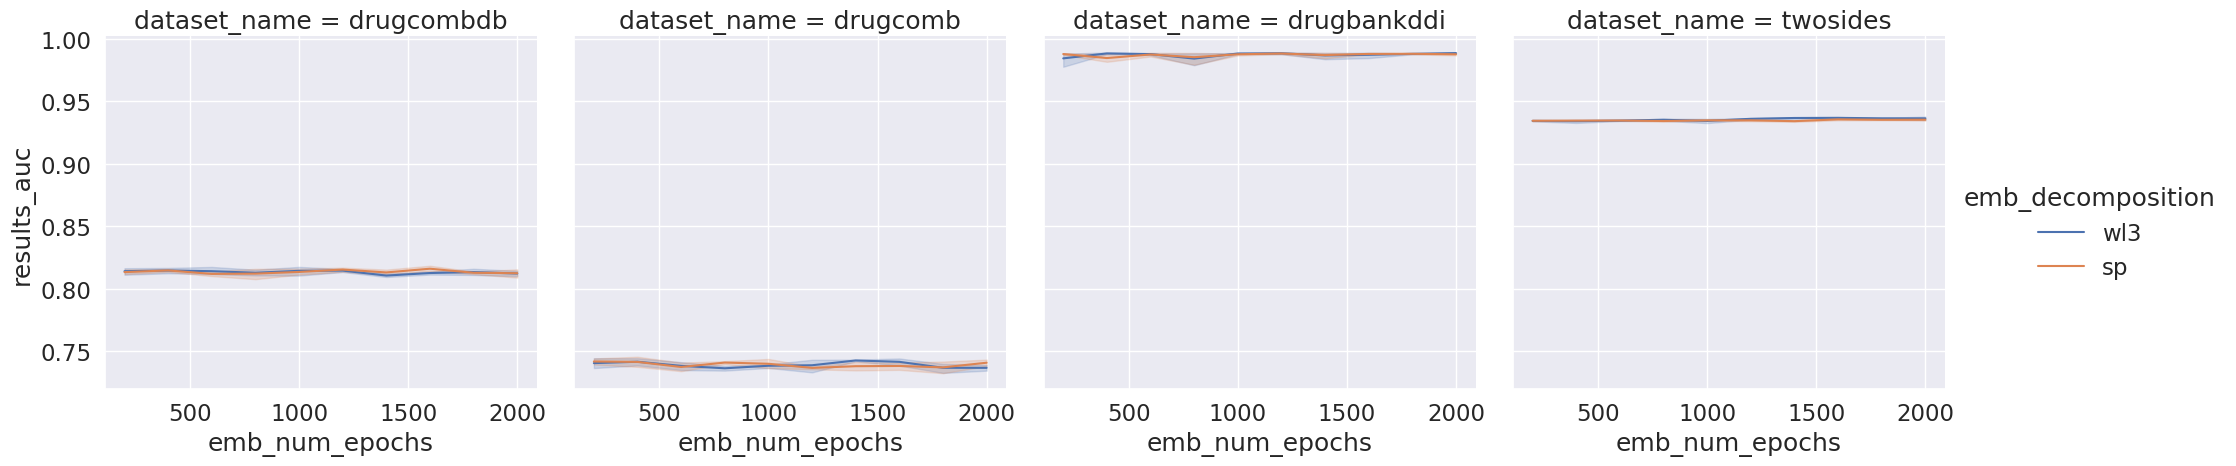

In [20]:
sns.set(font_scale=1.5)
g = sns.relplot(data = df, kind="line", 
                x="emb_num_epochs", 
                y="results_auc", 
                col="dataset_name", 
                col_order=["drugcombdb", "drugcomb", "drugbankddi", "twosides"], 
                hue="emb_decomposition",
                hue_order=["wl3", "sp"])
# ax0 = g.axes[0][0]
# ax0.axhline(0.933, ls="--", c="r")

### Individual dataset

In [21]:
dataset = "drugbankddi"

In [22]:
# Get the table of results with specified dataset, sp/wl3 decompositions, deepsynergydr, and embedding dimension==64
df = process_results2pandas("results", dataset)
df = df[((df['emb_dimension']==embdim) | (df['emb_dimension']==0)) & ((df['emb_num_epochs'].isin(embepochs)) | (df['emb_num_epochs']==0)) & (df['model_num_epochs']==model_num_epochs)]
df = df[(df['model_name'] == model_name) & (df['emb_decomposition'].isin(decompositions))]

In [23]:
from scipy.stats import pearsonr
x = df['emb_num_epochs']
y = df['results_auc']
r, p = pearsonr(x,y)
print(f"Pearson r: {r}")
print(f"p-value: {p}")

Pearson r: 0.1966647081148902
p-value: 0.049865196582319186
